In [4]:
import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt
import pandas            as pd
import lsqfit
import itertools
import sys
from tqdm import tqdm


In [5]:
from b2heavy.ThreePointFunctions.utils import read_config_fit, dump_fit_object
from b2heavy.FnalHISQMetadata import params as mdata

sys.path.append('/Users/pietro/code/software/B2heavy/routines')
from routines.fit_2pts_dispersion_relation import mom_to_p2, extract_energies
from routines.fit_2pts_dispersion_relation import dispersion_relation_lsqfit as disprel
from routines.fit_2pts_dispersion_relation import dispersion_relation        as disprel_plot

In [6]:
frm = '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/report'
ens = 'SuperFine'
mes = 'B'

tag = f'{ens}_{mes}'

momlist = ['000','100','200','300','400','100','211','222']
# momlist = ['000','100','200','300','100','211']
# momlist = ['000','100','200','300','400','100','211']

Lvol   = mdata(ens)['L']

In [218]:
e0 = extract_energies(ens,mes,momlist,readfrom=frm)

In [219]:
priors = dict(
    M1 = gv.gvar(0.5,1.5),
    M2 = gv.gvar(0.5,1.5),
    M4 = gv.gvar(0.5,1.5),
    w4 = gv.gvar(0.5,1.5)
)

pv = [2*np.pi/Lvol*np.array([float(px) for px in m]) for m in momlist]
yf = np.array([e0[m] for m in momlist])

fit = lsqfit.nonlinear_fit(
    data  = (pv,yf),
    fcn   = disprel,
    prior = priors
)

print(fit)

Least Square Fit:
  chi2/dof [dof] = 0.56 [8]    Q = 0.81    logGBF = 38.86

Parameters:
             M1   1.09309 (52)      [  0.5 (1.5) ]  
             M2      2.42 (66)      [  0.5 (1.5) ]  *
             M4     0.424 (91)      [  0.5 (1.5) ]  
             w4      0.2 (1.5)      [  0.5 (1.5) ]  

Settings:
  svdcut/n = 1e-12/1    tol = (1e-08,1e-10,1e-10*)    (itns/time = 14/0.0)
  fitter = scipy_least_squares    method = trf



Load jackknife data

In [220]:
e0j = extract_energies(ens,mes,momlist,readfrom=frm,jk=True)

tmp = np.array([e0j[m] for m in momlist])
tmp = gv.gvar(
    tmp.mean(axis=1),
    np.cov(tmp)*(tmp.shape[-1]-1)
)
e0j = {m: tmp[i] for i,m in enumerate(momlist)}

FileNotFoundError: [Errno 2] No such file or directory: '/Users/pietro/code/data_analysis/data/QCDNf2p1stag/B2heavy/report/fit2pt_config_SuperFine_B_000_jk_fit.pickle'

In [ ]:
yfj = np.array([e0j[m] for m in momlist])

fitj = lsqfit.nonlinear_fit(
    data  = (pv,yfj),
    fcn   = disprel,
    prior = priors
)

print(fitj)

Least Square Fit:
  chi2/dof [dof] = 2.3 [8]    Q = 0.02    logGBF = 33.127

Parameters:
             M1   1.25031 (47)      [  0.5 (1.5) ]  
             M2      4.12 (66)      [  0.5 (1.5) ]  **
             M4      0.80 (18)      [  0.5 (1.5) ]  
             w4      0.66 (76)      [  0.5 (1.5) ]  

Settings:
  svdcut/n = 1e-12/1    tol = (1e-08,1e-10,1e-10*)    (itns/time = 16/0.0)
  fitter = scipy_least_squares    method = trf



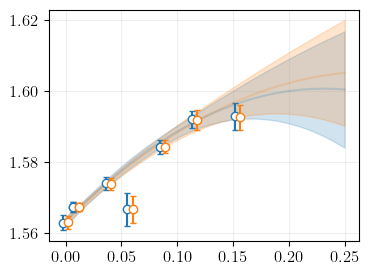

In [ ]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(4,3))
ax = plt.subplot(1,1,1)


p2 = np.array([mom_to_p2(m,L=Lvol) for m in momlist])


# Full
yplot = [e0[m] for m in momlist]
ax.errorbar(p2-0.0025,gv.mean(yplot),gv.sdev(yplot),fmt='o', ecolor='C0', mfc='w', capsize=2.5)

plist = [np.sqrt([x/3,x/3,x/3]) for x in np.arange(0,max(p2)+0.1,0.01)]
xplot = [sum(p**2) for p in plist]
fitpar = [fit.p[k] for k in ['M1','M2','M4','w4']]
fplot = [disprel_plot(p,*fitpar) for p in plist]
ax.plot(xplot,gv.mean(fplot),alpha=0.2,color='C0')
ax.fill_between(xplot,gv.mean(fplot)-gv.sdev(fplot),gv.mean(fplot)+gv.sdev(fplot),alpha=0.2,color='C0')





# With jk
yplot = [e0j[m] for m in momlist]
ax.errorbar(p2+0.0025,gv.mean(yplot),gv.sdev(yplot),fmt='o', ecolor='C1', mfc='w', capsize=2.5)


plist = [np.sqrt([x/3,x/3,x/3]) for x in np.arange(0,max(p2)+0.1,0.01)]
xplot = [sum(p**2) for p in plist]
fitpar = [fitj.p[k] for k in ['M1','M2','M4','w4']]
fplot = [disprel_plot(p,*fitpar) for p in plist]
ax.plot(xplot,gv.mean(fplot),alpha=0.2,color='C1')
ax.fill_between(xplot,gv.mean(fplot)-gv.sdev(fplot),gv.mean(fplot)+gv.sdev(fplot),alpha=0.2,color='C1')


# ax.set_xlim(xmax=0.08)
ax.grid(alpha=0.2)


In [10]:
d = read_config_fit('fit3pt_config_Coarse-1_xfstpar_100',jk=True,path=frm)

In [18]:
f0 = d['ratio']


gv.gvar(f0.mean(),f0.std())

-0.0963(24)